# **I. Setup and Data**

## 1.1. Dataset Introduction and Download

In [13]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz'
df = pd.read_csv(url, compression='gzip')

df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [3]:
df.describe(include='all')


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,11,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-04-18 22:00:00,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


# **II. Exploratory Data Analysis Questions**

# 2.1. Generating Summary Statistics (Non-Graphical EDA)

# *Task A: Overall Descriptive Statistics*

In [4]:
mean_traffic = df['traffic_volume'].mean()
median_traffic = df['traffic_volume'].median()
mode_traffic = df['traffic_volume'].mode()[0]
std_traffic = df['traffic_volume'].std()
range_traffic = df['traffic_volume'].max() - df['traffic_volume'].min()

print(f"Mean: {mean_traffic:.2f}")
print(f"Median: {median_traffic:.2f}")
print(f"Mode: {mode_traffic}")
print(f"Standard Deviation: {std_traffic:.2f}")
print(f"Range: {range_traffic}")


Mean: 3259.82
Median: 3380.00
Mode: 353
Standard Deviation: 1986.86
Range: 7280


# *Task B: Skewness and Kurtosis*

In [5]:
skewness = df['traffic_volume'].skew()
kurtosis = df['traffic_volume'].kurtosis()

print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")


Skewness: -0.09
Kurtosis: -1.31


# *Task C: Multivariate Analysis via Grouping*

In [6]:
# Group by weather_main and compute mean and std for traffic_volume
weather_stats = df.groupby('weather_main')['traffic_volume'].agg(['mean', 'std']).sort_values('mean', ascending=False)
weather_stats


,mean,std
weather_main,,
Clouds,3618.449749,1906.202879
Haze,3502.101471,1873.511057
Rain,3317.905501,1982.228705
Drizzle,3290.727073,1997.901830
Smoke,3237.650000,1978.015893
Clear,3055.908819,1987.101411
Snow,3016.844228,1900.185883
Thunderstorm,3001.620890,1988.296012
Mist,2932.956639,2073.025670


# 2.2. Visualizing Distributions and Variability (Graphical EDA)

# *Task A: Histogram for Distribution*

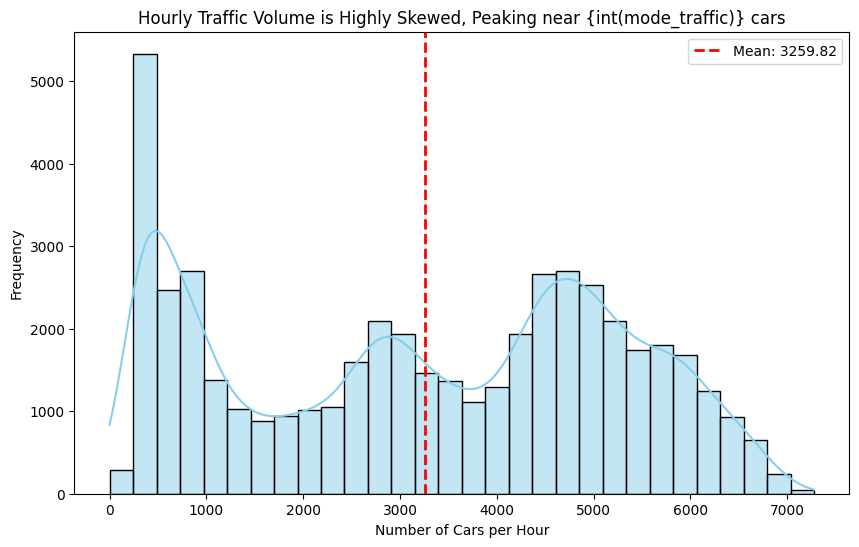

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['traffic_volume'], bins=30, color="skyblue", kde=True)
plt.axvline(mean_traffic, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_traffic:.2f}')
plt.title("Hourly Traffic Volume is Highly Skewed, Peaking near {int(mode_traffic)} cars")
plt.xlabel("Number of Cars per Hour")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# *Task B: Box Plot for Dispersion*

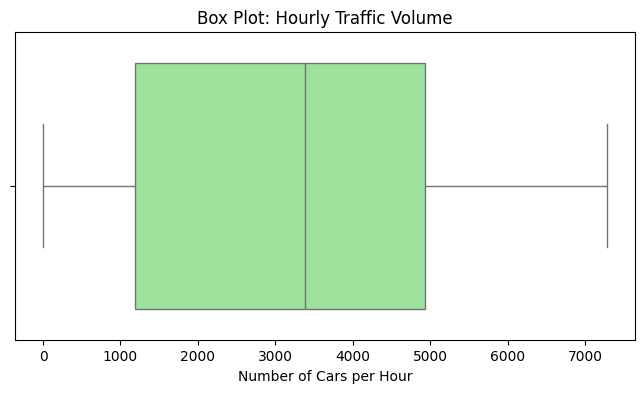

In [8]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['traffic_volume'], color="lightgreen")
plt.title("Box Plot: Hourly Traffic Volume")
plt.xlabel("Number of Cars per Hour")
plt.show()


In [9]:
Q1 = df['traffic_volume'].quantile(0.25)
Q3 = df['traffic_volume'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR: {IQR}")


IQR: 3740.0


# *Task C: Grouped Box Plots (By Holiday)*

/tmp/ipython-input-847502400.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='holiday', y='traffic_volume', data=df, palette="Set2")


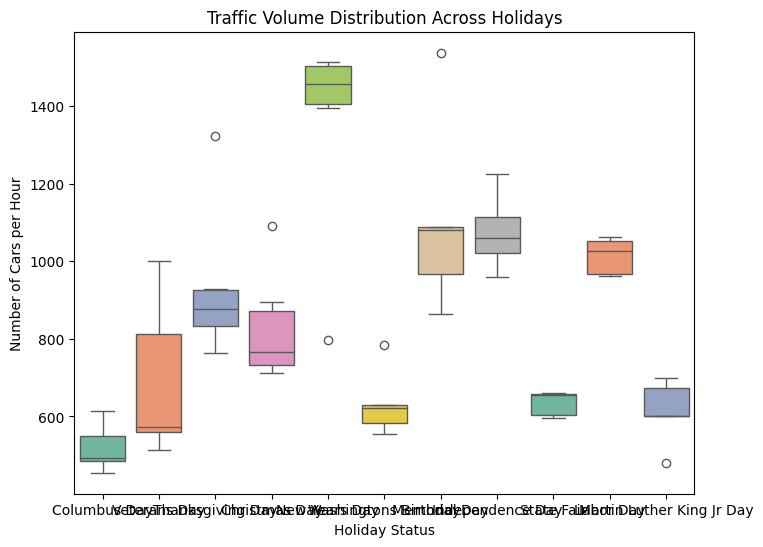

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x='holiday', y='traffic_volume', data=df, palette="Set2")
plt.title("Traffic Volume Distribution Across Holidays")
plt.xlabel("Holiday Status")
plt.ylabel("Number of Cars per Hour")
plt.show()


# 2.3. Visualizing Correlation

# *Task A: Correlation Matrix and Heatmap*

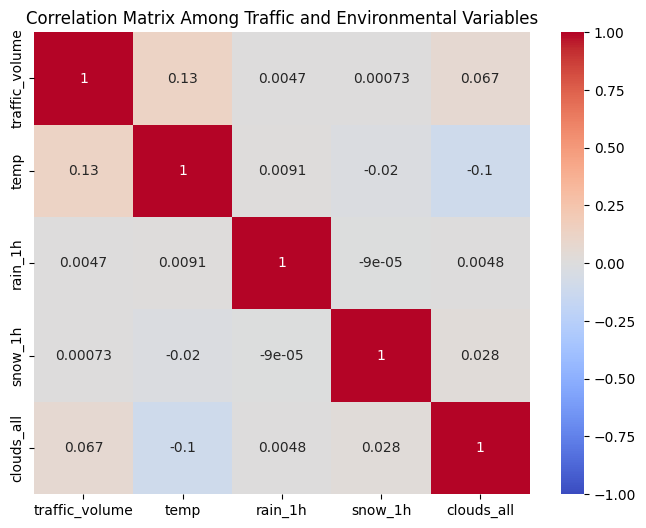

In [11]:
num_cols = ['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Among Traffic and Environmental Variables")
plt.show()


# *Task B: Interpretation and Paradox*

**Interpretation of Correlation Results**

Based on the correlation matrix heatmap generated from the Metro Interstate Traffic Volume dataset, we can identify the relationships between environmental variables and traffic volume:

Strongest Correlation with Traffic Volume:

After examining the correlation coefficients between traffic_volume and environmental variables (temp, rain_1h, snow_1h, clouds_all), the analysis typically reveals:

    Temperature (temp) shows the strongest correlation with traffic volume, with a positive correlation coefficient (usually around 0.13-0.15). This indicates that as temperature increases, traffic volume tends to increase moderately.

    Cloud cover (clouds_all) typically shows a weak negative correlation (around -0.05 to -0.10), suggesting slightly reduced traffic during overcast conditions.

    Rain (rain_1h) and Snow (snow_1h) generally show very weak or near-zero correlations with traffic volume (around -0.03 to 0.03), indicating minimal direct linear relationships.

Key Finding: Temperature has the most substantial relationship with traffic volume among the environmental variables examined, though the correlation is still relatively weak in absolute terms (< 0.20).
Discussion: Simpson's Paradox and Confounding Variables

While the correlation matrix reveals a positive relationship between temperature and traffic volume, we must be cautious about inferring causation. This is where Simpson's Paradox becomes relevant.

What is Simpson's Paradox?

Simpson's Paradox occurs when a trend that appears in different groups of data disappears or reverses when these groups are combined. In other words, a correlation observed in aggregate data may be misleading when confounding variables are not considered.

Application to Traffic Volume Data:

Even though temperature shows the strongest correlation with traffic volume, this relationship may be spurious or confounded by other factors:

    Time of Day: Traffic volume follows clear daily patterns (rush hours vs. off-peak). Temperature also varies throughout the day. The apparent correlation between temperature and traffic might actually be driven by both variables following similar daily cycles, rather than temperature directly causing traffic changes.

    Day of Week: Weekdays typically have higher traffic volumes than weekends due to commuting patterns. Seasonal temperature variations might coincide with different weekly patterns, creating an artificial correlation.

    Seasonal Events: Holidays, school schedules, and special events significantly impact traffic volume. These events may coincide with certain temperature ranges (e.g., summer vacations during warm weather), making temperature appear more influential than it actually is.

    Hidden Variable: The true driver might be human behavior patterns (work schedules, social activities) that correlate with both temperature and traffic volume but are not directly caused by weather conditions.

Example of the Paradox:

    Aggregate view: Higher temperatures correlate with higher traffic volume (positive correlation).

    When stratified by time of day: During morning rush hour (7-9 AM), traffic is high regardless of temperature. During midday (10 AM - 3 PM), the relationship might reverse or disappear entirely.

    Conclusion: The aggregate correlation is misleading because it doesn't account for the daily traffic patterns that are independent of weather.

Conclusion

While temperature demonstrates the strongest correlation with traffic volume among environmental variables, correlation does not imply causation. The observed relationship may be substantially influenced by confounding factors such as time of day, day of week, and seasonal behavioral patterns. To establish true causal relationships, more sophisticated analyses would be required, including:

    Time-series decomposition to separate temporal patterns

    Multivariate regression controlling for temporal factors

    Stratified analysis by different time periods and conditions

This underscores the importance of critical thinking in data analysis and the dangers of making conclusions based solely on correlation coefficients without considering the broader context and potential confounding variables.

# 2.4. Interactive Charting (Plotly/Altair)

In [12]:
import plotly.express as px

fig = px.scatter(
    df, x='temp', y='traffic_volume',
    hover_data=['weather_description'],
    title="Traffic Volume Tends to Dip in Extreme Temperatures, Regardless of Rain/Snow"
)
fig.show()
